In [1]:
import sys
sys.version

'3.6.8 (default, Jul 10 2019, 15:23:10) \n[GCC 4.2.1 Compatible Apple LLVM 10.0.1 (clang-1001.0.46.4)]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
X = np.arange(0, 5, 0.01)
#Y = np.sin(2*X) + np.cos(3*X) + np.random.uniform(size=X.shape)
true_Y = 0.01*X**3 - 0.5*X**2 - 0.1*X
Y = true_Y + np.random.uniform(size=X.shape)

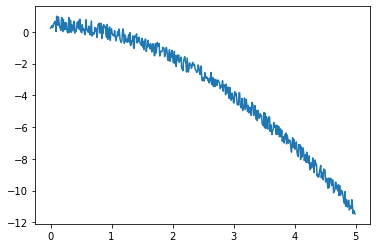

In [4]:
plt.plot(X, Y)

In [5]:
choice = np.random.choice(np.arange(1,X.shape[0]), replace=False, size=10)
choice.sort()

In [6]:
data_X = X[choice]
data_Y = Y[choice]

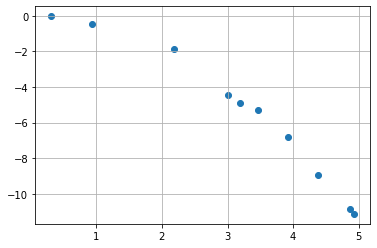

In [7]:
plt.scatter(data_X, data_Y)
plt.grid()

In [353]:
def phi(X):
    return np.stack([np.sin(3*X), np.sin(2*X), np.sin(X), np.ones_like(X)])

# wの分布
p.67
$$ p(w) = \mathcal{N} (w | 0, \sigma_{w}^2 I )$$

$$ \phi(x) = (x^3, x^2, x, 1)^T $$
$$ \sigma_{w}^2 = 1 $$

In [354]:
W = np.random.normal(size=(4, 10))

In [371]:
np.random.multivariate_normal(np.zeros(4), np.ones((4,4)))

array([-2.7358379, -2.7358379, -2.7358379, -2.7358379])

In [55]:
W[2]

array([ 1.09350605,  0.51272288, -0.04247727, -0.5282222 , -1.79517285,
        1.02768817,  1.11304763,  0.99339378, -0.55820777, -0.57842336])

In [45]:
phi_x = np.stack([X**3, X**2, X, np.ones_like(X)])

In [46]:
phi_x.shape

(4, 500)

In [355]:
w_y = W.T @ phi(X)

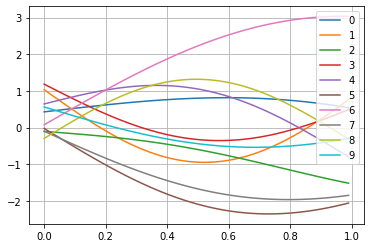

In [356]:
for i in range(10):
    plt.plot(X[:100], w_y[i][:100], label=str(i))
plt.grid()
plt.legend()
plt.show()

# 観測値によりwの分布が変わる
$$ \Sigma^{-1} = \sigma_{y}^{-2} \sum_{n=1}^{N} \phi(x_n) \phi(x_n)^T + \sigma_{w}^{-2} I $$
$$ \mu = \Sigma \sigma_{y}^{-2} \sum_{n=1}^{N} y_n \phi(x_n) $$

In [336]:
sigma_y = data_Y.var()
print(sigma_y)
#print(phi(data_X))

0.7946330096474233


In [258]:
phi(data_X).shape

(4, 5)

In [291]:
phi(data_X)@(phi(data_X).T)

array([[5.53671429e+04, 1.23453011e+04, 2.83605589e+03, 6.81916437e+02],
       [1.23453011e+04, 2.83605589e+03, 6.81916437e+02, 1.76446300e+02],
       [2.83605589e+03, 6.81916437e+02, 1.76446300e+02, 5.19300000e+01],
       [6.81916437e+02, 1.76446300e+02, 5.19300000e+01, 2.00000000e+01]])

In [175]:
np.sum((phi(data_X)**2), axis=1)+1

array([9.66419433e+04, 5.78573526e+03, 4.15199600e+02, 5.10000000e+01])

In [357]:
new_Sigma_ = (phi(data_X)@(phi(data_X).T))/sigma_y + np.eye(4)
#new_Sigma_ += np.ones_like(new_Sigma_)
new_Sigma = np.linalg.inv(new_Sigma_)

In [358]:
new_mu = new_Sigma/sigma_y @ np.sum(data_Y*phi(data_X), axis=1)

In [359]:
new_mu

array([ 0.04384898,  0.57689378, -0.24420409,  0.63427632])

In [360]:
prd_w = np.random.multivariate_normal(new_mu, new_Sigma, 10)

In [361]:
prd_w

array([[ 0.01944187,  0.47397352, -0.28339461,  0.71393937],
       [-0.36354029,  0.52584618, -0.50194361,  0.81213674],
       [-0.29600754,  0.36846453, -0.41281786,  0.69649912],
       [ 0.13468585,  0.59724802,  0.074454  ,  0.75698177],
       [ 0.32389095,  0.86483239,  0.03865408,  0.74619413],
       [-0.43015534,  0.91179805, -0.23109914,  0.70119351],
       [-0.03178576,  0.72723293, -0.25400449,  0.58490632],
       [ 0.3411394 ,  1.07470856, -0.05632322,  0.50039598],
       [-0.19653179,  0.39686238, -0.09390041,  0.42307401],
       [ 0.11705321,  0.71978525, -0.27486277,  0.57711854]])

In [362]:
prd_y = prd_w @ phi(X)

In [363]:
prd_y.shape

(10, 500)

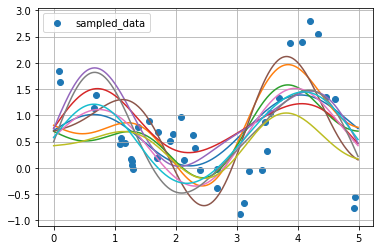

In [365]:
for i in range(10):
    plt.plot(X, prd_y[i])
plt.scatter(data_X, data_Y, label='sampled_data')
plt.grid()
plt.legend()
plt.show()

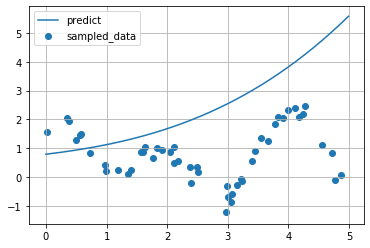

In [207]:
plt.plot(X, prd_y, label='predict')
#plt.scatter(X, Y, label='truth')
plt.scatter(data_X, data_Y, label='sampled_data')
plt.grid()
plt.legend()
plt.show()

In [369]:
phi(0).shape[0]

4

# 追加データ

In [379]:
# Initialize
sigma_w = 1
phi = lambda x: np.stack([x**3, x**2, x, np.ones_like(x)])
num_phi = phi(0).shape[0]
mu = np.zeros(num_phi)
cov = np.eye(num_phi) * sigma_w

In [380]:
w = np.random.multivariate_normal(mu, cov)

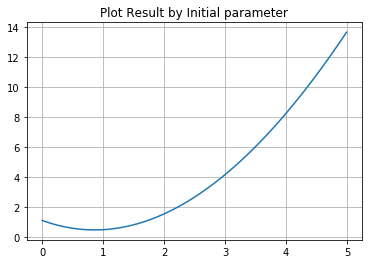

In [383]:
# 初期値でのプロット
plt.plot(X, w@phi(X))
plt.grid()
plt.title('Plot Result by Initial parameter')
plt.show()


In [389]:
# データを追加
new_mu = (mu.T)@

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 40 is different from 4)

In [388]:
new_mu.shape

(40,)

# クラス化

In [8]:
def Sampling(X, Y, size=50):
    choice = np.random.choice(np.arange(1,X.shape[0]), replace=False, size=size)
    choice.sort()
    return X[choice], Y[choice]

In [9]:
class BayesianLinearRegression:
    def __init__(self, sigma = 1, phi = 0):


        if(phi == 0):
            self.phi = lambda x: np.stack([np.sin(3*x), np.sin(2*x), np.sin(x), np.ones_like(x)])
        else:
            self.phi = phi
        
        self.num_phi = self.phi(0).shape[0]
        self.mu = np.zeros(self.num_phi)
        self.cov = np.eye(self.num_phi) * sigma

    def fit(self, X, Y):
        sigma_y = Y.var()
        _phi_X = self.phi(X)
        _new_Sigma = (_phi_X@(_phi_X.T))/sigma_y + np.eye(self.num_phi)

        new_Sigma = np.linalg.inv(_new_Sigma)
        new_mu = new_Sigma/sigma_y @ np.sum(Y*_phi_X, axis=1)

        self.cov = new_Sigma
        self.mu = new_mu
        self.var_y = 1

    def predict(self, X):
        _w = np.random.multivariate_normal(self.mu, self.cov)
        pred = _w@self.phi(X)
        return pred
    
    def average_predict(self, X):
        return self.mu@self.phi(X)

    def upper_predict(self, X):
        n_sigma = ((self.phi(X).T@self.cov)@self.phi(X))[0]
        n_sd = np.sqrt(np.abs(n_sigma) + self.var_y)
        n_mu = self.mu @ self.phi(X)
        return n_mu + n_sd
    
    def lower_predict(self, X):
        n_sigma = ((self.phi(X).T@self.cov)@self.phi(X))[0]
        n_sd = np.sqrt(np.abs(n_sigma) + self.var_y)
        n_mu = self.mu.T @ self.phi(X)
        return n_mu - n_sd




In [10]:
BLR = BayesianLinearRegression(phi = lambda x:np.stack([x**2, x, np.ones_like(x)]))

In [11]:
BLR = BayesianLinearRegression(phi = lambda x:np.stack([np.sin(x*4), np.sin(x*3), np.sin(x*2), np.sin(x), np.ones_like(x)]))

In [12]:
data_X, data_Y = Sampling(X[:100], Y[:100], size=30)
BLR.fit(data_X, data_Y)

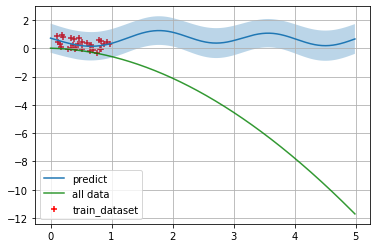

In [13]:
plt.plot(X, BLR.average_predict(X), label='predict')
plt.plot(X, true_Y, label='all data', c='green', alpha=0.8)
plt.scatter(data_X, data_Y, label='train_dataset', c='red', marker='+')
plt.fill_between(X, BLR.lower_predict(X), BLR.upper_predict(X), alpha=0.3)

plt.legend()
plt.grid()


In [41]:
BLR.mu

array([-0.02204578, -0.35297773, -0.07660941,  0.15747195])

In [151]:
((BLR.phi(X).T@BLR.cov)@BLR.phi(X)).flatten().shape

(250000,)

In [507]:
print(BLR.lower_predict(X)[10])
print(BLR.upper_predict(X)[10])

0.9277303426886652
1.859203902445859


In [492]:
np.sum(BLR.cov, axis=0)**1

array([-0.00193348,  0.01940775, -0.05270408, -0.00062145,  0.09185439,
        0.03522007])

In [529]:
(BLR.phi(X[450]).T@BLR.cov)@BLR.phi(X[450])

0.42739187094387526

In [519]:
BLR.phi(X).shape

(5, 500)